Wahlpflichtach Künstliche Intelligenz I: Praktikum | [Startseite](index.ipynb) | [**<< 03 - Kontrollfluss und Objektorientierung**](03%20-%20Kontrollfluss%20und%20Objektorientierung.ipynb)

---

# 04 - Numerische Berechnungen in Numpy

- [Numpy Arrays erstellen](#Numpy-Arrays-erstellen)
- [Datentypen](#Datentypen)
- [Mit Arrays rechnen](#Mit-Arrays-rechnen)
- [Funktionen auf Arrays anwenden](#Funktionen-auf-Arrays-anwenden)
- [Numpy Arrays sind Reihen](#Numpy-Arrays-sind-Reihen)
- [Broadcasting](#Broadcasting)
- [Aggregationsfunktionen](#Aggregationsfunktionen)
- [Daten einlesen und speichern](#Daten-einlesen-und-speichern)
- [Erweiterte Indizierung](#Erweiterte-Indizierung)
- [Erweitern, Reduzieren, Kombinieren von Arrays](#Erweitern,-Reduzieren,-Kombinieren-von-Arrays)
- [Numpy print Möglichkeiten](#Numpy-print-Möglichkeiten)

## Das Modul Numpy

Python Listen sind sehr flexibel, da sie Werte unterschiedlicher Datentypen beinhalten können und einfach verändert werden können (bspw. mit `append`). Diese Flexibilität geht jedoch auf Kosten der Performance, sodass Listen für numerische Berechnungen nicht ideal sind.

Das **Numpy** Modul definiert daher den n-dimensionalen **Array** Datentyp `numpy.ndarray`, der für numerische Berechnungen auf höchst performanten C und Fortran Code zurückgreift.

Arrays können nur Werte eines einzelnen numerischen Datentyps (bspw. floating point Werte) enthalten und sind sehr viel starrer als Listen. Dies ist jedoch für viele wissenschaftliche Anwendung, wie die Arbeit mit Datensätzen, genau was wir brauchen!

Wir importieren das Numpy Modul per Konvention unter der Abkürzung `np`:

In [1]:
import numpy as np

### Einführendes Beispiel

In Python eingebaute Container wie `list` bieten eine flexible Möglichkeit, Daten zu speichern und zu verwalten. Wie bereits erwähnt, speichern Sammlungen normalerweise nur Referenzen auf Objekte. Das ist zwar beim Schreiben von Code sehr praktisch, hat aber Kosten für die Performance im Speicher zur Folge. 

Lassen Sie uns ein Beispiel betrachten. Sagen wir, wir haben in einem Experiment eine Million Messungen gemacht und wollen nun den Mittelwert davon berechnen. Wir könnten dies auf die folgende Weise tun.

In [2]:
import random 
measurements = [random.randint(150, 200) for _ in range(1_000_000)]
print(measurements[:100])

[200, 189, 190, 167, 153, 169, 197, 178, 176, 162, 191, 156, 179, 190, 185, 165, 182, 154, 192, 195, 176, 181, 179, 183, 157, 153, 188, 165, 159, 182, 172, 186, 181, 151, 176, 186, 185, 188, 184, 165, 151, 182, 191, 160, 181, 176, 194, 172, 153, 181, 194, 155, 185, 196, 157, 174, 157, 184, 196, 188, 154, 160, 160, 159, 158, 151, 185, 200, 170, 157, 191, 182, 171, 195, 179, 177, 168, 165, 178, 166, 161, 170, 155, 165, 165, 171, 163, 160, 166, 151, 182, 159, 192, 164, 181, 163, 181, 164, 166, 167]


Das ist ziemlich langsam, da Python in jeder Schleife eine neue Variable binden muss und dann prüfen muss, ob die `+`-Operation zwischen dem `Akkumulator` und der aktuellen `Messung` unterstützt wird. Das verhindert, dass es versucht, Objekte zu addieren, die nicht addiert werden können, aber in diesem Fall sind wir ziemlich sicher, dass wir es nur mit ganzen Zahlen zu tun haben. Wenn wir dem Interpreter sagen könnten, dass wir nur ganze Zahlen addieren, könnten wir die ganze Typüberprüfung überspringen und die Operation beschleunigen. Für diesen Zweck wurde `numpy` erfunden.  

In [3]:
def mean(values):
    accumulator = 0
    for value in values:
        accumulator += value
    mean_value = accumulator / len(values)
    return mean_value

%timeit mean(measurements)

28.9 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Wir können bereits schnellere Berechnungen erreichen, wenn wir versuchen, so viele von Pythons eingebauten Funktionen wie `sum` zu verwenden.

In [4]:
%timeit sum(measurements) / len(measurements)

6.76 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Der Standard-Datentyp von Numpy ist das `ndarray` (was für n-dimensionales Array steht). Im einfachsten Fall kann ein Numpy-Array aus einer Liste erstellt werden.

In [5]:
measurements_array = np.array(measurements)
measurements_array

array([200, 189, 190, ..., 186, 155, 197])

In [6]:
type(measurements_array)

numpy.ndarray

Sie verhalten sich sehr ähnlich wie Listen, haben aber einen festen Datentyp darunter. Numpy merkt automatisch, dass alle unsere Werte Interger sind und wählt den passenden Datentyp. Eine Ganzzahl, die 64 Bit Speicherplatz benötigt. https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [7]:
measurements_array.dtype

dtype('int64')

Außerdem bietet numpy eine Menge Routinen für mathematische Operationen von Arrays. Schauen wir mal, ob wir durch den Einsatz von numpy tatsächlich etwas gewonnen haben.

In [8]:
%timeit np.mean(measurements_array)

763 µs ± 9.92 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Ein deutlicher Geschwindigkeitszuwachs im Vergleich zu den reinen Python-Implementierungen! Nachdem wir uns von der Nützlichkeit von NumPy überzeugt haben, werfen wir einen genaueren Blick auf das Numpy-Array.

## Numpy Arrays erstellen

Am einfachsten erstellen wir Numpy Arrays aus Python Listen, indem wir die `numpy.array` Funktion verwenden:

In [9]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"

<class 'numpy.ndarray'>


In [10]:
a = np.array([ 1, 2, 3, 5, 8, 13])
a

array([ 1,  2,  3,  5,  8, 13])

In [11]:
b = np.array([[  1.5, 2.2, 3.1 ], [ 4.0, 5.2, 6.7 ]])
b

array([[1.5, 2.2, 3.1],
       [4. , 5.2, 6.7]])

Numpy Arrays haben einige **Attribute**, die hilfreiche Informationen über das Array geben:

In [12]:
a.ndim, b.ndim # Die Zahl der Dimensionen des Arrays

(1, 2)

In [13]:
a.shape, b.shape # Die Länge des Arrays in jeder Dimension

((6,), (2, 3))

In [14]:
a.dtype, b.dtype # Der Datentyp des Arrays

(dtype('int64'), dtype('float64'))

> **Erinnerung:** Verwendet die `<TAB>`-Autovervollständigung und die `?`-Dokumentation im Jupyter Notebook wenn ihr nicht wisst, welche Funktionen es gibt oder was diese bewirken!

In [14]:
values = [[0, 1, 2, 3, 4]] * 3
two_dim_arr = np.array(values)
two_dim_arr

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [15]:
two_dim_arr.shape

(3, 5)

In [16]:
two_dim_arr.ndim

2

In [17]:
values = [[[0, 1, 2, 3, 4]] * 3] * 6
three_dim_arr = np.array(values)
three_dim_arr

array([[[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [18]:
three_dim_arr.shape

(6, 3, 5)

In [20]:
three_dim_arr.ndim

3

#### Es gibt viele Möglichkeiten, Arrays zu erstellen

- Die `numpy.arange` Funktion arbeitet ähnlich wie Python's `range` Funktion, kann jedoch auch floating-point Argumente annehmen:

In [19]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.arange(1.5, 2, 0.1)

array([1.5, 1.6, 1.7, 1.8, 1.9])

- Außerdem sehr hilfreich sind `numpy.linspace` und `numpy.logspace`, welche eine Anzahl von Werten in linearem oder logarithmischem Abstand zwischen zwei Zahlen generiert:

In [21]:
np.linspace(10, 20, 4)

array([10.        , 13.33333333, 16.66666667, 20.        ])

In [22]:
np.logspace(1, 3, 4)

array([  10.        ,   46.41588834,  215.443469  , 1000.        ])

- Wir können mit `numpy.zeros` und `numpy.ones` Arrays erstellen, die mit Nullen oder Einsen gefüllt sind. Indem wir dem Argument `shape` dieser Funktionen statt einem Integer einen Tupel übergeben, können wir auch mehrdimensionale Arrays erzeugen:

In [23]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [24]:
np.ones((5, 2, 3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [26]:
c = np.full((2,2,2,2), 4)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

[[[[4 4]
   [4 4]]

  [[4 4]
   [4 4]]]


 [[[4 4]
   [4 4]]

  [[4 4]
   [4 4]]]]


In [27]:
# Corresponds to whatever was left in memory. Using zeros for initialising arrays is usually saver.
np.empty(shape=(2, 3, 2))

array([[[4.68246928e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [1.12465777e-312, 1.18887655e-075]],

       [[5.98733558e+174, 7.24749351e+169],
        [4.76190542e-038, 1.88793779e+185],
        [1.04014881e-042, 2.10688777e-076]]])

In [28]:
# empty is faster than initialized arrays but usually doesn't make a difference
%timeit np.empty(shape=100_000)
%timeit np.ones(shape=100_000)

524 ns ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
20.3 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [29]:
d = np.eye(3)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [30]:
e = np.random.random((2,2,2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[[[0.65386697 0.55152079]
   [0.11862979 0.2910911 ]]

  [[0.96102629 0.65637651]
   [0.38316362 0.05544021]]]


 [[[0.91466637 0.72127973]
   [0.10137643 0.73265433]]

  [[0.77443646 0.10652524]
   [0.33054444 0.99935168]]]]


Über andere Methoden der Array-Erstellung können Sie [in der Dokumentation](http://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation) nachlesen.

## Datentypen

Jedes Numpy-Array ist ein Grid aus Elementen desselben Typs. Numpy bietet einen großen Satz von numerischen Datentypen, die Sie zum Konstruieren von Arrays verwenden können. Numpy versucht, einen Datentyp zu erraten, wenn Sie ein Array erstellen, aber Funktionen, die Arrays konstruieren, enthalten normalerweise auch ein optionales Argument, um den Datentyp explizit anzugeben. Hier ist ein Beispiel:

In [31]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

int64


In [32]:
x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

float64


In [33]:
x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)

int64


### dtype

`dtype` gibt Auskunft über den Datentyp. Arrays können bools, ints, unsigned ints, floats oder komplexe Zahlen verschiedener Bytegrößen enthalten. Sie können auch Zeichenketten oder Python-Objekte speichern, aber das hat nur sehr wenige Anwendungsfälle.

In [34]:
values = [0, 1, 2, 3, 4]
int_arr = np.array(values, dtype='int')
int_arr, int_arr.dtype

(array([0, 1, 2, 3, 4]), dtype('int64'))

Wenn der dtype nicht mit den angegebenen Werten übereinstimmt, castet numpy alles in diesen Datentyp.

In [35]:
bool_arr = np.array(values, dtype='bool')
bool_arr, bool_arr.dtype

(array([False,  True,  True,  True,  True]), dtype('bool'))

Wenn kein expliziter Datentyp angegeben wird, wählt numpy den "kleinsten gemeinsamen Nenner". Im folgenden Beispiel wird alles zu einem Float, da Ints als Floats dargestellt werden können, aber nicht umgekehrt.

In [36]:
values = [0, 1, 2.5, 3, 4]
float_arr = np.array(values)
float_arr, float_arr.dtype

(array([0. , 1. , 2.5, 3. , 4. ]), dtype('float64'))

Sobald jedoch der Datentyp festgelegt ist, wird alles auf diesen Typ gezwungen.

In [37]:
int_arr[1] = 2.5
int_arr, int_arr.dtype

(array([0, 2, 2, 3, 4]), dtype('int64'))

Diese Nicht-Python-Datentypen zwingen uns, erneut über Probleme wie Überlauf etc. nachzudenken.

In [38]:
values = [0, 1, 2, 3, 4]
uint_arr = np.array(values, dtype='uint8')
uint_arr, uint_arr.dtype

(array([0, 1, 2, 3, 4], dtype=uint8), dtype('uint8'))

In [39]:
uint_arr[1] += 255
uint_arr

array([0, 0, 2, 3, 4], dtype=uint8)

...und kann zu einigen Problemen führen, wenn man sie mit Standard-Python-Typen vergleicht

In [40]:
print(type(uint_arr[0]), type(183))

<class 'numpy.uint8'> <class 'int'>


In [41]:
val = 1.2 - 1.0
arr = np.array([val], dtype=np.float32)
print(f'{val} == {arr[0]} -> {val == arr[0]}')

0.19999999999999996 == 0.20000000298023224 -> False


Zum besseren Vergleich können Sie mit einem Epsilon-Wert vergleichen:

In [42]:
epsilon = 1e-6  # 1*10^(-6); 0.000001
abs(arr[0] - val) < epsilon

True

http://effbot.org/pyfaq/why-are-floating-point-calculations-so-inaccurate.htm

Sie können alles über Numpy-Datentypen [in der Dokumentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) nachlesen .

**Wiederholen Sie das bis jetzt Gelernte in Bezug auf Numpy für sich selber!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Erstellen Sie ein 3*3-Array, das ausschließlich aus True besteht.**

<br>
<br>
<br>
<br>

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

In [44]:
np.ones((3,3), dtype='bool')

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Mit Arrays rechnen

Arrays können mit den Standardoperatoren `+-*/**` **elementweise** kombiniert werden:

In [44]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [45]:
# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [46]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [47]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [48]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [49]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


In [50]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x)
print(y)

[1 2 3]
[4 5 6]


In [51]:
x + 2 * y

array([ 9, 12, 15])

In [52]:
x ** y

array([  1,  32, 729])

Mit `@` können Sie sogar eine Matrixmultiplikation durchführen. Im Fall von 1d-Arrays ist dies das innere Produkt zwischen zwei Vektoren.

In [53]:
x @ y

32

In [54]:
# That's the same as
np.sum(x * y)

32

In [55]:
x.dot(y)

32

> **Achtung:** Für Python-Listen sind diese Operatoren völlig anders definiert!

Beachten Sie, dass `*` im Gegensatz zu MATLAB eine elementweise Multiplikation und keine Matrixmultiplikation ist. Wir verwenden stattdessen die Funktion `dot` zur Berechnung innerer Produkte von Vektoren, zur Multiplikation eines Vektors mit einer Matrix und zur Multiplikation von Matrizen. `dot` ist sowohl als Funktion im Numpy-Modul als auch als Instanzmethode von Array-Objekten verfügbar:

In [56]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

In [57]:
# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [58]:
# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [59]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


## Funktionen auf Arrays anwenden

Während Funktionen aus dem `math` Modul wie `sin` oder `exp` auf Zahlen anwendbar sind, sind die gleichnamigen Funktionen aus dem `numpy` Modul auf Arrays anwendbar. **Die Funktion wird auf alle Element des Arrays** angewendet und ist typischerweise um einiges schneller als jedes Element einzeln zu berechnen:

In [63]:
phi = np.linspace(0, 2 * np.pi, 10) # 10 Werte zwischen 0 und 2π
np.sin(phi) # Der Sinus jedes dieser Werte

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [64]:
arr = np.arange(-9, 9)
arr

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8])

In [65]:
np.log(arr)

/tmp/ipykernel_66402/3120950136.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(arr)
/tmp/ipykernel_66402/3120950136.py:1: RuntimeWarning: invalid value encountered in log
  np.log(arr)


array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,       -inf,
       0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154])

In [66]:
np.exp(arr)

array([1.23409804e-04, 3.35462628e-04, 9.11881966e-04, 2.47875218e-03,
       6.73794700e-03, 1.83156389e-02, 4.97870684e-02, 1.35335283e-01,
       3.67879441e-01, 1.00000000e+00, 2.71828183e+00, 7.38905610e+00,
       2.00855369e+01, 5.45981500e+01, 1.48413159e+02, 4.03428793e+02,
       1.09663316e+03, 2.98095799e+03])

In [67]:
np.sin(arr)

array([-0.41211849, -0.98935825, -0.6569866 ,  0.2794155 ,  0.95892427,
        0.7568025 , -0.14112001, -0.90929743, -0.84147098,  0.        ,
        0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427,
       -0.2794155 ,  0.6569866 ,  0.98935825])

`np.sign` liefert -1 für negative Werte, +1 für positive Werte und 0 für 0:

In [68]:
np.sign(arr)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        1])

Numpy bietet viele nützliche Funktionen zur Durchführung von Berechnungen auf Arrays; eine der nützlichsten ist `sum`:

In [69]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


Außerdem gibt es weitere Funktionen, die Eigenschaften eines Arrays berechnen:

In [70]:
x = np.linspace(0, 10, 100)
np.sum(x), np.mean(x), np.std(x)

(500.0, 5.0, 2.9157646512850626)

Diese Funktionen generalisieren auf mehrere Dimensionen, indem die Achse angegeben wird, auf der die Berechnung durchgeführt werden soll:

In [71]:
x = np.array([[ 1, 2 ], [ 3, 4 ]])
np.sum(x), np.sum(x, axis=0), np.sum(x, axis=1)

(10, array([4, 6]), array([3, 7]))

Abgesehen von der Berechnung mathematischer Funktionen mit Hilfe von Arrays, müssen wir häufig Daten in Arrays umformen oder anderweitig manipulieren. Das einfachste Beispiel für diese Art von Operation ist das Transponieren einer Matrix; um eine Matrix zu transponieren, verwenden Sie einfach das Attribut "T" eines Array-Objekts:

In [72]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [73]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1, 2, 3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[1 2 3]
[1 2 3]


Versuchen Sie immer, vektorisierte ufuncs anstelle von expliziten Schleifen zu verwenden! 

Die Verwendung dieser Operatoren/Universalfunktionen ist in der Regel schneller als das anderweitige Schreiben der Operationen:

In [75]:
var1 = lambda: np.repeat(np.arange(1, 4), 30).reshape(3, -1).T.flatten()
var2 = lambda: np.arange(3 * 30) % 3 + 1
var3 = lambda: np.array([[1, 2, 3] for _ in range(30)]).flatten()

print(var1())
print(var2())
print(var3())

%timeit var1()
%timeit var2()
%timeit var3()

[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
3.43 µs ± 31.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.75 µs ± 43.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
10.1 µs ± 357 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Zufällige Werte

`np.random` enthält eine Reihe von Funktionen, um Arrays zu erzeugen, die mit Zufallswerten verschiedener Wahrscheinlichkeitsverteilungen gefüllt sind.

In [76]:
np.random.random((3, 3))

array([[0.61688948, 0.44129561, 0.13604513],
       [0.01620436, 0.35459402, 0.89689167],
       [0.03382937, 0.79753877, 0.89604756]])

In [77]:
np.random.randint(0, 10, (5, 5))

array([[9, 1, 0, 0, 5],
       [6, 7, 6, 6, 2],
       [8, 2, 5, 1, 0],
       [5, 1, 2, 0, 2],
       [4, 6, 5, 3, 9]])

Mit ``np.random.randint`` und einem boolean dtype können Sie zufällige boolesche Arrays erzeugen!

### Wiederholende Werte

Mit ``np.repeat`` werden Elemente eines Arrays wiederholt:

In [78]:
np.repeat(3, 5)

array([3, 3, 3, 3, 3])

In [79]:
np.repeat([[1,2], [3,4]], 2)

array([1, 1, 2, 2, 3, 3, 4, 4])

`np.tile` ist eine weitere Möglichkeit, Werte mit NumPy zu wiederholen.

In [80]:
print('Repeat:', np.repeat([1, 2, 3], 3))
print('Tile:', np.tile([1, 2, 3], 3))

Repeat: [1 1 1 2 2 2 3 3 3]
Tile: [1 2 3 1 2 3 1 2 3]


### Reshape

In [81]:
a = np.arange(start=2, stop=14)
print(a.shape)
a

(12,)


array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [82]:
b = a.reshape(3, 4)
b

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

-1 als Achse ermittelt automatisch die Größe der jeweiligen Dimension

In [83]:
a.reshape(-1, 2)

array([[ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13]])

Beispiel: Wir möchten ein 2D-Array erstellen, bei dem jede Zeile [1, 2, 3] ist und das 10 Zeilen haben soll.

In [84]:
print(np.repeat(np.arange(1, 4), 10).reshape(-1, 10).T, "\n")
print(np.tile(np.arange(1, 4), 10).reshape(10, -1))

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]] 

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


### Arrays vergleichen

In [85]:
epsilon = 0.000000000001
a = np.zeros((3, 3))
a[0, 0] += epsilon  # a[0][0] -> list

b = np.zeros((3, 3))
print(a)
print(b)

[[1.e-12 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [86]:
a == b

array([[False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [87]:
(a == b).all()

False

In [88]:
c = np.array([])
d = np.array([1])
(c == d).all()

True

Probleme bei dieser Vorgehensweise: 
* Wenn entweder a oder b leer ist und das andere ein einzelnes Element enthält, wird dies True zurückgeben (der Vergleich a==b gibt ein leeres Array zurück, für das der All-Operator True zurückgibt).
* Wenn a und b nicht die gleiche Form haben und nicht übertragbar sind, dann wird dieser Ansatz einen Fehler auslösen.

Verwenden Sie stattdessen numpys bereitgestellte Funktionen!

In [89]:
np.array_equal(c, d)

False

In [90]:
np.allclose(a, b)

True

In [91]:
np.isclose(a, b)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Die vollständige Liste der von numpy bereitgestellten mathematischen Funktionen finden Sie [in der Dokumentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

**Jetzt haben Sie kurz Zeit, sich mit dem Modul `numpy` und dem Anlegen von Numpy-Arrays und der Anwendung von Funktionen auf diese zu beschäftigen!**

Bearbeiten Sie inbesondere die folgende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Erstellen Sie ein 5x5-Array, in dem *statistisch* im Schnitt 1/4 der Elemente Falsch sind, alle anderen sind Wahr (`randint()` und `astype(bool)`).**

<br>
<br>
<br>
<br>

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

## Numpy Arrays sind Reihen

Wir können alle Funktionen auf Numpy Arrays anwenden die für Reihen definiert sind.

In [92]:
a = np.arange(3)
len(a)

3

In [93]:
for x in a:
    print(x)

0
1
2


Wir können mit eckigen Klammern auf Elemente zugreifen:

In [94]:
a[0]

0

In [95]:
a[0] = 5                 
print(a)                  

[5 1 2]


#### Slicing wählt Teile eines Arrays aus

Die Slicing-Syntax von Reihen haben wir schon kennengelernt. Sie erlaubt uns, auf einzelne Elemente oder Teile einer Reihe zuzugreifen:

```python
a[start:stop:step]
```

Erweitert auf mehrdimensionale Arrays:

```python
b[start:stop:step, start:stop:step]
```

In [96]:
x = np.arange(10)
print(x[:5])
print(x[::2])

[0 1 2 3 4]
[0 2 4 6 8]


In [97]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [98]:
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [99]:
print(a[0, 1])
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])  

2
77


Alternativ können wir statt einem Index auch eine **Liste von Indizes** (auch _Fancy Indexing_ genannt, werden wir später noch einmal, wenn Zeit ist, tiefer besprechen) in das Subskript schreiben und erhalten die zugehörigen Elemente aus dem Array:

In [101]:
x = np.array([1, 6, 4, 7, 9])
indices = [1, 0, 2, 1]
x[indices]

array([6, 1, 4, 6])

Sie können auch eine ganzzahlige Indizierung mit einer Slice-Indizierung kombinieren. Dies führt jedoch zu einem Array mit niedrigerem Rang als das ursprüngliche Array. Beachten Sie, dass sich dies von der Art und Weise unterscheidet, wie MATLAB mit Array-Slicing umgeht:

In [102]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [104]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape) 

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [105]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) 
print(col_r2, col_r2.shape)  

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Ganzzahlige Array-Indizierung**: Wenn Sie mit Slicing in Numpy-Arrays indizieren, ist die resultierende Array-Ansicht immer ein Unterarray des ursprünglichen Arrays. Im Gegensatz dazu erlaubt Ihnen die Integer-Array-Indizierung, beliebige Arrays zu konstruieren, indem Sie die Daten eines anderen Arrays verwenden. Hier ist ein Beispiel:

In [107]:
a = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])

In [108]:
print(a[[0, 1, 2], [0, 1, 0]]) 

[1 4 5]


In [109]:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]


In [110]:
print(a[[0, 0], [1, 1]])

[2 2]


In [111]:
print(np.array([a[0, 1], a[0, 1]]))

[2 2]


Ein nützlicher Trick bei der Indizierung von Integer-Arrays ist das Auswählen oder Ändern eines Elements aus jeder Zeile einer Matrix:

In [112]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [113]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])

[ 1  6  7 11]


In [114]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


#### Masking filtert ein Array

Außerdem erweitert Numpy diese Syntax um die **Masking** Funktionalität. Dabei geben wir im Subskript ein **Array von Booleans** an, welches die gleiche Länge hat, und erhalten nur die Elemente, für die wir `True` angegeben haben:

In [115]:
x = np.array([1, 6, 4, 7, 9])
mask = np.array([True, True, False, False, True])
x[mask]

array([1, 6, 9])

Masking ist deshalb äußerst praktisch, weil die **Vergleichsoperatoren** in Kombination mit Numpy Arrays wiederum Boolean Arrays zurückgeben:

In [116]:
x > 4

array([False,  True, False,  True,  True])

Somit können wir Teile eines Arrays herausfiltern, die einer **Bedingung** entsprechen:

In [117]:
x[x > 4]

array([6, 7, 9])

Bedingungen werden mit dem `&` Operator kombiniert:

In [118]:
x[(x > 4) & (x < 8)]

array([6, 7])

#### Slices oder Masken eines Arrays kann auch zugewiesen werden

Wenn ein Slice oder eine Maske eines Arrays auf der linken Seite einer Zuweisung steht, wird diesem Teil des Original-Arrays zugewiesen:

In [119]:
x = np.array([1, 6, 4, 7, 9])
x[x > 4] = 0
x

array([1, 0, 4, 0, 0])

Der Kürze halber haben wir viele Details über weitere Möglichkeiten der Indizierung von Numpy-Arrays weggelassen. Wenn Sie mehr wissen wollen, sollten Sie [die Dokumentation](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html) lesen.

**Schauen Sie sich jetzt nochmal in Ruhe die Indizierung, das Slicen und das Maskieren in Numpy an!**

Bearbeiten Sie inbesondere die folgendende **Übung** und schreiben Sie die Antwort am Ende der Bearbeitungszeit in den Chat: 

**Ersetzt alle ungeraden Zahlen im angegebenen Array durch -1:**

```python
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

## Broadcasting
Broadcasting ist ein leistungsfähiger Mechanismus, der es numpy ermöglicht, bei der Durchführung von arithmetischen Operationen mit Arrays unterschiedlicher Form zu arbeiten. Häufig haben wir ein kleineres Array und ein größeres Array, und wir wollen das kleinere Array mehrfach verwenden, um eine Operation auf dem größeren Array durchzuführen.

Numpy versucht, die Arrays nach drei Regeln zu expandieren und ihre Formen übereinstimmen zu lassen, damit die Operation elementweise angewendet werden kann. 

**1. Regel** Wenn die Arrays eine unterschiedliche Anzahl von Dimensionen haben, wird die kleinere Form mit Einsen auf ihrer linken Seite aufgefüllt.<br/>
            Beispiel: (5 x 3) + (3) &rarr; (5 x 3) + (**1** x 3)<br/>
**2. Regel** Wenn die Anzahl der Dimensionen übereinstimmt, aber die Größe einer Dimension nicht, werden Dimensionen mit der Größe 1 aufgefüllt.<br/>
            Beispiel: (5 x 3) + (1 x 3) &rarr; (5 x 3) + (**5** x 3)<br/>
**3. Regel** Wenn sich die Formen der Arrays nach Anwendung der Regel 1 und 2 immer noch verschieben, wird ein Broadcasting-Fehler ausgelöst.

![](images/04/broadcasting.png)

The Numpy documentation gives further insights https://docs.scipy.org/doc/numpy-1.14.0/user/basics.broadcasting.html.

Nehmen wir zum Beispiel an, dass wir zu jeder Zeile einer Matrix einen konstanten Vektor hinzufügen wollen. Wir könnten das so machen:

In [120]:
x = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])

v = np.array([1, 0, 1])
y = np.empty_like(x)   

for i in range(4):
    y[i, :] = x[i, :] + v
    
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Dies funktioniert; wenn die Matrix `x` jedoch sehr groß ist, könnte die Berechnung einer expliziten Schleife in Python langsam sein. Beachten Sie, dass das Hinzufügen des Vektors `v` zu jeder Zeile der Matrix `x` äquivalent zur Bildung einer Matrix `vv` ist, indem mehrere Kopien von `v` vertikal gestapelt werden und dann eine elementweise Summierung von `x` und `vv` durchgeführt wird. Wir könnten diesen Ansatz wie folgt implementieren:

In [121]:
x = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])

v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   
print(vv)                 

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [122]:
y = x + vv
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Mit Numpy-Broadcasting können wir diese Berechnung durchführen, ohne tatsächlich mehrere Kopien von "v" zu erstellen. Betrachten Sie diese Version, die Broadcasting verwendet:

In [123]:

x = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])

v = np.array([1, 0, 1])
y = x + v 

print(y)  

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Die Zeile `y = x + v` funktioniert, obwohl `x` aufgrund der Übertragung die Form `(4, 3)` und `v` die Form `(3,)` hat; diese Zeile funktioniert, als ob `v` tatsächlich die Form `(4, 3)` hätte, wobei jede Zeile eine Kopie von `v` wäre und die Summe elementweise durchgeführt würde.

Das Zusammenschalten von zwei Arrays erfolgt nach den folgenden Regeln:

1. Wenn die Arrays nicht den gleichen Rang haben, wird der Form des Arrays mit dem niedrigeren Rang eine 1 vorangestellt, bis beide Formen die gleiche Länge haben.
1. Die beiden Arrays werden als kompatibel in einer Dimension bezeichnet, wenn sie die gleiche Größe in der Dimension haben oder wenn eines der Arrays die Größe 1 in dieser Dimension hat.
1. Die Arrays können zusammen übertragen werden, wenn sie in allen Dimensionen kompatibel sind.
1. Nach dem Broadcasting verhält sich jedes Array so, als hätte es die Form, die dem elementweisen Maximum der Formen der beiden Eingangs-Arrays entspricht.
1. In jeder Dimension, in der ein Array die Größe 1 und das andere Array eine Größe größer als 1 hat, verhält sich das erste Array so, als ob es entlang dieser Dimension kopiert würde
Wenn diese Erklärung keinen Sinn ergibt, versuchen Sie, die Erklärung [aus der Dokumentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) oder [diese Erklärung](http://wiki.scipy.org/EricsBroadcastingDoc) zu lesen.

Funktionen, die Broadcasting unterstützen, werden als universelle Funktionen bezeichnet. Die Liste aller universellen Funktionen finden Sie [in der Dokumentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Hier sind einige Anwendungen von Broadcasting:

In [124]:
# Compute outer product of vectors
v = np.array([1, 2, 3])  # v has shape (3,)
w = np.array([4, 5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [125]:
# Add a vector to each row of a matrix
x = np.array([[1, 2, 3], [4, 5, 6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

[[2 4 6]
 [5 7 9]]


In [126]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [127]:
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [128]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting macht Ihren Code in der Regel prägnanter und schneller, daher sollten Sie sich bemühen, es zu verwenden, wo es möglich ist.

## Aggregationsfunktionen
Aggregationsfunktionen sind Funktionen, die die Dimensionalität eines Arrays reduzieren. Sie liefern ein Argument "Achse", um anzugeben, welche Dimension reduziert werden soll.

In [129]:
np.random.seed(1)
two_dim_arr = np.random.randint(0, high=20, size=(4, 4))
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12],
       [ 7, 13,  6, 18]])

Wenn nur das Array übergeben wird, wird die Aggregationsoperation über das gesamte Array ausgeführt.

In [130]:
np.min(two_dim_arr)

0

Mit dem optionalen Argument `axis` können wir angeben, welche Dimension aggregiert werden soll. Man kann sich das so vorstellen, dass die Operation auf alle Einträge angewendet wird, die sich ergeben, wenn man die Indizes in allen Dimensionen außer der Dimension `axis` festhält.

Schauen wir uns das Ergebnis der Minimum-Operation mit `axis=0` an:

In [131]:
np.min(two_dim_arr, axis=0)

array([ 0, 11,  1,  8])

Das Achsenkonzept erstreckt sich auf mehr als eine Dimension

In [132]:
np.random.seed(1)
three_dim_arr = np.random.randint(0, high=20, size=(4, 4, 4))
three_dim_arr

array([[[ 5, 11, 12,  8],
        [ 9, 11,  5, 15],
        [ 0, 16,  1, 12],
        [ 7, 13,  6, 18]],

       [[ 5, 18, 11, 10],
        [14, 18,  4,  9],
        [17,  0, 13,  9],
        [ 9,  7,  1,  0]],

       [[17,  8, 13, 19],
        [15, 10,  8,  7],
        [ 3,  6, 17,  3],
        [ 4, 17, 11, 12]],

       [[16, 13, 19,  9],
        [18, 15,  0,  4],
        [15,  2,  7,  8],
        [ 9,  3,  7,  4]]])

In [133]:
np.min(three_dim_arr, axis=0)

array([[ 5,  8, 11,  8],
       [ 9, 10,  0,  4],
       [ 0,  0,  1,  3],
       [ 4,  3,  1,  0]])

Hier ist der Eintrag bei Index `[0, 0]`, d.h. `5` das Minimum der folgenden Werte. 

In [135]:
for i in range(4):
    print(three_dim_arr[i, 0, 0])

5
5
17
16


Lassen Sie uns noch einmal alle Achsen mit einem anderen dreidimensionalen Array demonstrieren:

In [136]:
a = np.array([[[2, 4], [6, 9]], [[3, 1], [7, 8]], [[4, 5], [9, 0]]])
a, a.shape

(array([[[2, 4],
         [6, 9]],
 
        [[3, 1],
         [7, 8]],
 
        [[4, 5],
         [9, 0]]]),
 (3, 2, 2))

In [137]:
np.min(a)

0

In [138]:
np.min(a, axis=0)

array([[2, 1],
       [6, 0]])

Das Setzen des Achsen-Arguments ist gleichbedeutend damit, alle anderen Achsen des jeweiligen Arrays der Reihe nach durchzugehen und für jede Kombination davon das jeweilige Aggregat zurückzugeben.

In [139]:
for i in range(a.shape[1]):
    for j in range(a.shape[2]):
        print(a[:, i, j])

[2 3 4]
[4 1 5]
[6 7 9]
[9 8 0]


Für `axis=1` wird eine Schleife durch Achse 0 und Achse 2 durchlaufen:

In [133]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [140]:
np.min(a, axis=1)

array([[2, 4],
       [3, 1],
       [4, 0]])

In [141]:
for i in range(a.shape[0]):
    for j in range(a.shape[2]):
        print(a[i, :, j])

[2 6]
[4 9]
[3 7]
[1 8]
[4 9]
[5 0]


...und schließlich durchlaufen wir für `axis=2` die Achsen 0 und 1:

In [136]:
a

array([[[2, 4],
        [6, 9]],

       [[3, 1],
        [7, 8]],

       [[4, 5],
        [9, 0]]])

In [142]:
np.min(a, axis=2)

array([[2, 6],
       [1, 7],
       [4, 0]])

In [143]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(a[i, j, :])

[2 4]
[6 9]
[3 1]
[7 8]
[4 5]
[9 0]


Die Form des resultierenden Arrays ist einfach die Form des ursprünglichen Arrays, wobei die angegebene Achse weggelassen wird:

In [144]:
mins = []
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        mins.append(min(a[i,j,:]))
np.array(mins).reshape([a.shape[0], a.shape[1]])

array([[2, 6],
       [1, 7],
       [4, 0]])

...allerdings ist die Verwendung von numpy natürlich viel schneller als die Schleifenbildung über das Array:

In [145]:
def find_min_manual(arr):
    mins = []
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            mins.append(min(arr[i,j,:]))
    np.array(mins).reshape([arr.shape[0], arr.shape[1]])

%timeit find_min_manual(a)
%timeit np.min(a, axis=2)

8.41 µs ± 86.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.43 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### np.nan

In [146]:
np.nan == np.nan

False

In [147]:
np.isnan(np.nan)

True

In [148]:
a = np.r_[np.arange(5), np.repeat(0, 5)]
a

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0])

In [150]:
b = a / a
b

/tmp/ipykernel_66402/1505135007.py:1: RuntimeWarning: invalid value encountered in true_divide
  b = a / a


array([nan,  1.,  1.,  1.,  1., nan, nan, nan, nan, nan])

In [151]:
~np.isnan(b)

array([False,  True,  True,  True,  True, False, False, False, False,
       False])

In [152]:
b[~np.isnan(b)]

array([1., 1., 1., 1.])

In [153]:
np.divide(a, a, out=np.zeros(a.shape), where=(a!=0)) 
# at the positions where a!=0, make the division,
# at other indices use what's specified as "out"

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

### Mehr als eine Dimension

Aggregationsfunktionen können auch mehr als eine Dimension auf einmal aggregieren.

In [154]:
three_dim_arr = np.random.randint(0, 10, (4, 2, 3))
three_dim_arr

array([[[5, 9, 3],
        [6, 8, 0]],

       [[2, 7, 7],
        [9, 7, 3]],

       [[0, 8, 7],
        [7, 1, 1]],

       [[3, 0, 8],
        [6, 4, 5]]])

In [155]:
np.min(three_dim_arr, axis=(1, 2))

array([0, 2, 0, 0])

### Andere Aggregationsfunktionen

In [156]:
two_dim_arr

array([[ 5, 11, 12,  8],
       [ 9, 11,  5, 15],
       [ 0, 16,  1, 12],
       [ 7, 13,  6, 18]])

In [157]:
np.max(two_dim_arr)

18

In [158]:
np.max(two_dim_arr, axis=0)

array([ 9, 16, 12, 18])

In [159]:
np.max(two_dim_arr, axis=1)

array([12, 15, 16, 18])

In [160]:
np.sum(two_dim_arr)

149

In [161]:
np.sum(two_dim_arr, axis=0)

array([21, 51, 24, 53])

In [162]:
np.sum(two_dim_arr, axis=1)

array([36, 40, 29, 44])

Viele dieser Funktionen sind auch als Methode auf dem Array-Objekt verfügbar.

In [163]:
two_dim_arr.sum(axis=0)

array([21, 51, 24, 53])

### Flatten
Wir möchten ein beliebiges Array in ein 1D-Array umwandeln.

In [164]:
a = np.arange(64).reshape((2, 2, 2, 2, 2, 2))
a

array([[[[[[ 0,  1],
           [ 2,  3]],

          [[ 4,  5],
           [ 6,  7]]],


         [[[ 8,  9],
           [10, 11]],

          [[12, 13],
           [14, 15]]]],



        [[[[16, 17],
           [18, 19]],

          [[20, 21],
           [22, 23]]],


         [[[24, 25],
           [26, 27]],

          [[28, 29],
           [30, 31]]]]],




       [[[[[32, 33],
           [34, 35]],

          [[36, 37],
           [38, 39]]],


         [[[40, 41],
           [42, 43]],

          [[44, 45],
           [46, 47]]]],



        [[[[48, 49],
           [50, 51]],

          [[52, 53],
           [54, 55]]],


         [[[56, 57],
           [58, 59]],

          [[60, 61],
           [62, 63]]]]]])

In [165]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

**Steigen Sie jetzt nochmal ein bisschen selber für sich persönlich in das Flatten und das Broadcasting von Numpy-Arrays ein. Für die spätere Programmierung in Python und auch inbesondere im Umfeld von Machine Learning ist ein guter Umgang mit Numpy-Arrays elementar!**

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

## Daten einlesen und speichern

Mit der `numpy.loadtxt` Funktion können wir Daten aus einer Datei als Numpy Array einlesen:

In [166]:
data = np.loadtxt('data/04/temperatures.txt')
data.shape

(6679, 2)

Die Funktion gibt ein zweidimensionales Array mit den _Zeilen_ der eingelesenen Datei zurück. Alle Werte einer _Spalte_ können wir durch Slicing erhalten:

In [167]:
date = data[:,0] # Alle Zeilen, jeweils erste Spalte
T = data[:,1] # Alle Zeilen, jeweils zweite Spalte
date, T

(array([1995.00274, 1995.00548, 1995.00821, ..., 2013.27926, 2013.282  ,
        2013.28474]),
 array([ 0.944444, -1.61111 , -3.55556 , ..., 10.5556  ,  8.94444 ,
        11.1667  ]))

> **Hinweis:** Die `numpy.loadtxt` Funktion kann auch direkt ein Array für jede Spalte zurückgeben, wenn das Argument `unpack=True` übergeben wird:
>
> ```python
> date, T = np.loadtxt('data/04/temperatures.txt', unpack=True)
> ```
>
> Weitere praktische Optionen, wie die ersten Zeilen zu überspringen u.ä., findet ihr in der Dokumentation. Entfernt das '`#`'-Zeichen in der folgenden Zelle und schaut euch die Optionen mal an:

In [162]:
np.loadtxt?

Mit der verwandten `np.savetxt` Funktion können wir Daten als Textdatei abspeichern:

In [163]:
#np.savetxt?

#### Berechnungen zwischenspeichern mit `numpy.save`

Die `numpy.loadtxt` und `numpy.savetxt` Funktionen arbeiten mit Textdateien. Wenn ihr ein Numpy Array jedoch nur zwischenspeichern möchtet, bspw. das Ergebnis einer langen numerischen Berechnung, könnt ihr es auch mit `numpy.save` in einer `.npy` Binärdatei speichern:

In [168]:
# lange numerischen Berechnung hier
result = np.random.random(10)
print(result)
# Ergebnis zwischenspeichern
np.save('data/04/result.npy', result)

[0.51488911 0.94459476 0.58655504 0.90340192 0.1374747  0.13927635
 0.80739129 0.39767684 0.1653542  0.92750858]


Anstatt die Berechnung jedes mal erneut durchführen zu müssen, könnt ihr nun einfach mit `numpy.load` das zwischengespeicherte Ergebnis laden:

In [169]:
result = np.load('data/04/result.npy')
print(result)

[0.51488911 0.94459476 0.58655504 0.90340192 0.1374747  0.13927635
 0.80739129 0.39767684 0.1653542  0.92750858]


> **Hinweis:** Diese Vorgehensweise kann viel Zeit sparen während ihr an einem Teil eures Programms arbeitet, das die numerische Berechnung nicht betrifft, bspw. die graphische Ausgabe als Plot.

## Erweiterte Indizierung

Numpy bietet Indizierungsmethoden, die über die aus Standard-Python-Sequenzen bekannten Indizierungstechniken hinausgehen.

### Mehrdimensionale Indizierung

Sie können einen Doppelpunkt verwenden, um alle Werte aus dieser Dimension zu erhalten.

In [170]:
large_two_dim_arr = np.arange(81).reshape((9, 9))
large_two_dim_arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [171]:
large_two_dim_arr[:, 1]

array([ 1, 10, 19, 28, 37, 46, 55, 64, 73])

Standard-Slicing mit `(start, stop, step)` funktioniert wie erwartet.

In [172]:
large_two_dim_arr[:, 1:3]

array([[ 1,  2],
       [10, 11],
       [19, 20],
       [28, 29],
       [37, 38],
       [46, 47],
       [55, 56],
       [64, 65],
       [73, 74]])

In [173]:
large_two_dim_arr[:, 2:7:2]

array([[ 2,  4,  6],
       [11, 13, 15],
       [20, 22, 24],
       [29, 31, 33],
       [38, 40, 42],
       [47, 49, 51],
       [56, 58, 60],
       [65, 67, 69],
       [74, 76, 78]])

Slices eines Arrays sind immer `views`. Das heißt, Sie "betrachten" den gleichen Teil des Arrays aus einer anderen Perspektive. Das spart eine Menge Speicher, aber es bedeutet auch, dass das ursprüngliche Array geändert wird, wenn Sie die Ansicht ändern.

In [174]:
arr_slice = large_two_dim_arr[:, 1]
arr_slice[:] = 0
large_two_dim_arr

array([[ 0,  0,  2,  3,  4,  5,  6,  7,  8],
       [ 9,  0, 11, 12, 13, 14, 15, 16, 17],
       [18,  0, 20, 21, 22, 23, 24, 25, 26],
       [27,  0, 29, 30, 31, 32, 33, 34, 35],
       [36,  0, 38, 39, 40, 41, 42, 43, 44],
       [45,  0, 47, 48, 49, 50, 51, 52, 53],
       [54,  0, 56, 57, 58, 59, 60, 61, 62],
       [63,  0, 65, 66, 67, 68, 69, 70, 71],
       [72,  0, 74, 75, 76, 77, 78, 79, 80]])

In [175]:
large_two_dim_arr[:, 2] = 0
large_two_dim_arr

array([[ 0,  0,  0,  3,  4,  5,  6,  7,  8],
       [ 9,  0,  0, 12, 13, 14, 15, 16, 17],
       [18,  0,  0, 21, 22, 23, 24, 25, 26],
       [27,  0,  0, 30, 31, 32, 33, 34, 35],
       [36,  0,  0, 39, 40, 41, 42, 43, 44],
       [45,  0,  0, 48, 49, 50, 51, 52, 53],
       [54,  0,  0, 57, 58, 59, 60, 61, 62],
       [63,  0,  0, 66, 67, 68, 69, 70, 71],
       [72,  0,  0, 75, 76, 77, 78, 79, 80]])

In [176]:
l2 = np.copy(large_two_dim_arr)
l2[:, 6] = 0
large_two_dim_arr

array([[ 0,  0,  0,  3,  4,  5,  6,  7,  8],
       [ 9,  0,  0, 12, 13, 14, 15, 16, 17],
       [18,  0,  0, 21, 22, 23, 24, 25, 26],
       [27,  0,  0, 30, 31, 32, 33, 34, 35],
       [36,  0,  0, 39, 40, 41, 42, 43, 44],
       [45,  0,  0, 48, 49, 50, 51, 52, 53],
       [54,  0,  0, 57, 58, 59, 60, 61, 62],
       [63,  0,  0, 66, 67, 68, 69, 70, 71],
       [72,  0,  0, 75, 76, 77, 78, 79, 80]])

In [177]:
l2

array([[ 0,  0,  0,  3,  4,  5,  0,  7,  8],
       [ 9,  0,  0, 12, 13, 14,  0, 16, 17],
       [18,  0,  0, 21, 22, 23,  0, 25, 26],
       [27,  0,  0, 30, 31, 32,  0, 34, 35],
       [36,  0,  0, 39, 40, 41,  0, 43, 44],
       [45,  0,  0, 48, 49, 50,  0, 52, 53],
       [54,  0,  0, 57, 58, 59,  0, 61, 62],
       [63,  0,  0, 66, 67, 68,  0, 70, 71],
       [72,  0,  0, 75, 76, 77,  0, 79, 80]])

Wenn Sie alle Werte aus mehreren aufeinanderfolgenden Dimensionen benötigen, können Sie Ellipsen (`...`) als Kurzzeichen verwenden.

In [178]:
# Ellipsis is an actual Python object.
print(...)

Ellipsis


In [182]:
# np.stack joins arrays along a new axis.
four_dim_arr = np.stack((np.ones((3, 3, 3)), 
                         np.ones((3, 3, 3)) * 2, 
                         np.ones((3, 3, 3)) * 3, 
                         np.ones((3, 3, 3)) * 4))
four_dim_arr

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],


       [[[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],

        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]]],


       [[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]],


       [[[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]],

        [[4., 4., 4.],
         [4., 4., 4.],
         [4., 4., 4.]]]])

In [183]:
four_dim_arr.shape

(4, 3, 3, 3)

In [184]:
four_dim_arr[3, :, :, :]

array([[[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

In [178]:
four_dim_arr[1,..., 1]

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [185]:
four_dim_arr[..., 1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]]])

### Fancy indexing
Sie können ein Array mit Indizes übergeben, dies ist besonders nützlich, um zufällige Elemente aus einem Array zu ziehen.

In [191]:
arr = np.arange(9) + 10
arr

array([10, 11, 12, 13, 14, 15, 16, 17, 18])

In [192]:
indices = np.array([1, 4, 5])
arr[indices]

array([11, 14, 15])

Das resultierende Array wird die Form des Index-Arrays widerspiegeln.

In [188]:
indices = np.array([[1, 4],
                    [5, 7]])
arr[indices]

array([[11, 14],
       [15, 17]])

Sie können jede Dimension separat indizieren.

In [189]:
two_dim_arr = np.arange(25).reshape(5, 5)
two_dim_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [193]:
x_indices = np.array([3, 4])
y_indices = np.array([1, 2])
two_dim_arr[x_indices, y_indices] # Corresponds to indexing at [3, 1] and [4, 2].

array([16, 22])

Mit `np.argsort` können Sie die Indizes eines Arrays sortieren, so dass Sie andere Arrays auf die gleiche Weise sortieren können (beachten Sie, dass ich vstack nur zu Demonstrationszwecken verwende)

In [194]:
a = np.random.randint(0, 10, 10)
b = a**2
np.vstack((a, b))

array([[ 0,  2,  0,  7,  1,  7,  9,  8,  4,  0],
       [ 0,  4,  0, 49,  1, 49, 81, 64, 16,  0]])

In [195]:
indices = a.argsort()
indices

array([0, 2, 9, 4, 1, 8, 3, 5, 7, 6])

In [196]:
np.vstack((a[indices], b[indices]))

array([[ 0,  0,  0,  1,  2,  4,  7,  7,  8,  9],
       [ 0,  0,  0,  1,  4, 16, 49, 49, 64, 81]])

### Advanced Masking

In [197]:
arr = np.arange(1, 7)
arr

array([1, 2, 3, 4, 5, 6])

Verschiedene Masken können mit bitweisen logischen Operatoren kombiniert werden. Diese sind die vektorisierte Version der logischen Operatoren und sollten nicht mit `and`, `or` und `not` verwechselt werden, wenn sie den Wahrheitswert eines ganzen Objekts auswerten.

In [198]:
smaller_or_equal_four = (arr <= 4)
smaller_or_equal_four   

array([ True,  True,  True,  True, False, False])

In [199]:
greater_two = (arr > 2)
greater_two

array([False, False,  True,  True,  True,  True])

Bitweise `and` `&`.

In [200]:
greater_two & smaller_or_equal_four

array([False, False,  True,  True, False, False])

In [201]:
# This does not work.
greater_two and smaller_or_equal_four

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
arr

In [202]:
arr[greater_two & smaller_or_equal_four]

array([3, 4])

Bitweise `or` mit `|`.

In [204]:
arr[greater_two | smaller_or_equal_four]

array([1, 2, 3, 4, 5, 6])

Bitweise xor mit `^`.

In [205]:
arr

array([1, 2, 3, 4, 5, 6])

In [206]:
arr[greater_two ^ smaller_or_equal_four]

array([1, 2, 5, 6])

Bitweise Negation mit `~`.

In [207]:
arr[~((arr < 2) ^ (arr > 2))]

array([2])

In [208]:
arr[~greater_two]

array([1, 2])

In [209]:
# Gives everything smaller or equal to 2.
arr[~greater_two] = 2
arr

array([2, 2, 3, 4, 5, 6])

#### Verwendung von np.where

Die Verwendung von Maskierung verändert immer das ursprüngliche Array, während manchmal das ursprüngliche Array eher unverändert bleiben sollte. ``np.where`` ermittelt die Indizes eines Arrays, bei denen die angegebene Bedingung wahr ist.

In [210]:
a = np.arange(9).reshape(3, 3)
a[a % 3 == 0] = 0
a

array([[0, 1, 2],
       [0, 4, 5],
       [0, 7, 8]])

In [212]:
a = np.arange(9).reshape(3, 3)
indices = np.where(a % 3 == 0)
indices

(array([0, 1, 2]), array([0, 0, 0]))

In [213]:
b = np.ones((3, 3))
b[indices] = 0
b

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.]])

`where` kann auch verwendet werden, um einem neuen Array Werte zuzuweisen:

In [216]:
np.where(a % 3 == 0, 0, a)

array([[0, 1, 2],
       [0, 4, 5],
       [0, 7, 8]])

In [217]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

`np.argwhere` gibt die Indizes gruppiert nach Element zurück:

In [218]:
a = np.eye(4) * np.arange(16).reshape(4,4)
a

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.],
       [ 0.,  0., 10.,  0.],
       [ 0.,  0.,  0., 15.]])

In [219]:
np.argwhere(a)

array([[1, 1],
       [2, 2],
       [3, 3]])

In [220]:
np.where(a)

(array([1, 2, 3]), array([1, 2, 3]))

**Wiederholen Sie jetzt das Einlesen von Daten und die erweiterte Indizierung von Numpy! Sie werden es warscheinlich in Zukunft brauchen.**

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

## Erweitern, Reduzieren, Kombinieren von Arrays

### Hinzufügen neuer Dimensionen mit `np.newaxis`

Anstelle von `np.newaxis` kann auch `None` verwendet werden.

In [221]:
one_dim_arr = np.arange(5)
one_dim_arr, one_dim_arr.shape

(array([0, 1, 2, 3, 4]), (5,))

In [222]:
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [224]:
two_dim_arr = one_dim_arr[:, np.newaxis, None]
two_dim_arr, two_dim_arr.shape

(array([[[0]],
 
        [[1]],
 
        [[2]],
 
        [[3]],
 
        [[4]]]),
 (5, 1, 1))

Das Hinzufügen neuer Dimensionen ist z.B. nützlich, wenn Tensorflow für Batch-Inputs verwendet wird, Sie aber einen einzelnen Datenpunkt für die Vorhersage bereitstellen wollen:

In [225]:
one_dim_arr[:, None]

array([[0],
       [1],
       [2],
       [3],
       [4]])

### Entfernen von Dimensionen

`arr.squeeze()` entfernt die Dimensionen der Größe 1:

In [226]:
one_dim_arr = np.arange(5)
two_dim_arr = one_dim_arr[np.newaxis, :]
two_dim_arr, two_dim_arr.shape

(array([[0, 1, 2, 3, 4]]), (1, 5))

In [227]:
two_dim_arr.squeeze(), two_dim_arr.squeeze().shape

(array([0, 1, 2, 3, 4]), (5,))

In [228]:
a = np.arange(5).reshape(1, -1, 1, 1)
a

array([[[[0]],

        [[1]],

        [[2]],

        [[3]],

        [[4]]]])

In [229]:
a.squeeze()

array([0, 1, 2, 3, 4])

### Kombinieren von Arrays
Es gibt viele Möglichkeiten, bestehende Arrays zu kombinieren, wie `np.append`, `np.concatenate` und `np.stack`. Bei diesen Operationen muss jedoch immer das gesamte Array kopiert werden. Daher ist es oft sinnvoller, im Vorfeld ein Array in der später benötigten Größe zu allokieren und dann nur die jeweiligen Teile zu füllen.

In [230]:
np.concatenate((np.arange(10), np.arange(10)[::-1]))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Eine schnelle und einfache Möglichkeit, Skalare und Arrays zu kombinieren, ist die Verwendung von ``np.r_``, mit den gewünschten Arrays, Listen oder Zahlen in eckigen Klammern:

In [231]:
np.r_[2, 2, 2, np.arange(10), np.arange(10)[::-1], [0, 1, 2]]

array([2, 2, 2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 8, 7, 6, 5, 4, 3, 2, 1,
       0, 0, 1, 2])

``np.append`` verwendet intern eine Verkettung:

In [232]:
np.append(np.arange(10), np.arange(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Für höherdimensionale Arrays sind andere Funktionen sinnvoll:

In [233]:
np.stack((np.arange(10), np.arange(10)))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Es gibt auch die Funktionen ``np.vstack`` (zeilenweises Stacking) und ``np.hstack`` (spaltenweises Stacking):
* hstack ist äquivalent zur Verkettung entlang der zweiten Achse, außer für 1-D-Arrays, wo es entlang der ersten Achse verkettet
* vstack ist äquivalent zur Verkettung entlang der ersten Achse, nachdem 1-D-Arrays der Form (N,) zu (1,N) umgeformt worden sind.

In [234]:
two_dim_arr = np.arange(16).reshape(4, -1)
two_dim_arr_2 = np.arange(16).reshape(4, -1) + 16
two_dim_arr, two_dim_arr_2

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]),
 array([[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]]))

In [235]:
np.hstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3, 16, 17, 18, 19],
       [ 4,  5,  6,  7, 20, 21, 22, 23],
       [ 8,  9, 10, 11, 24, 25, 26, 27],
       [12, 13, 14, 15, 28, 29, 30, 31]])

In [225]:
np.vstack((two_dim_arr, two_dim_arr_2))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

### Zufallsgesteuerter Zugriff mit random.seed

Wenn ein Zufalls-Seed gesetzt ist, verwendet der Zufallszahlen-Generator immer wieder die gleichen Zahlen. Dies ist sehr nützlich zum Testen, aber natürlich nimmt dies jegliche Zufälligkeit aus allem heraus, so dass es nicht im endgültigen Code verwendet werden sollte:

In [236]:
for _ in range(5):
    np.random.seed(0)
    print(np.random.random(5))

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


Um sie zu deaktivieren, setzen Sie einen Zufallswert von ``None``, in diesem Fall generiert numpy Zufallszahlen unter Verwendung Ihrer System-Zufälligkeit (oder der Systemzeit, ...)

In [237]:
for _ in range(5):
    np.random.seed(None)
    print(np.random.random(5))

[0.26209008 0.34003149 0.47548143 0.60646916 0.76853282]
[0.37927986 0.78000907 0.1386749  0.85287742 0.56287565]
[0.62915753 0.96010622 0.64211712 0.86231344 0.61202231]
[0.50140487 0.67519048 0.49684478 0.3364906  0.26826837]
[0.32629893 0.92006309 0.80923708 0.20308866 0.62868967]


### Mischen von Arrays

``np.random.shuffle`` mischt ein Array ab der ersten Dimension. Das heißt, ein eindimensionales wird komplett gemischt, während bei mehrdimensionalen Arrays die Arrays ab der zweiten Dimension intakt bleiben.

In [238]:
a = np.arange(10)
np.random.shuffle(a)
a

array([0, 8, 9, 2, 3, 7, 6, 4, 1, 5])

In [239]:
a = np.arange(9).reshape(3, 3)
np.random.shuffle(a)
a

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

Um das Array vollständig zu mischen, können Sie es flatten und anschließend wieder in seine ursprüngliche Form bringen:

In [240]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [241]:
b = a.flatten()
np.random.shuffle(b)
a = b.reshape(a.shape)
a

array([[0, 3, 5],
       [1, 4, 2],
       [7, 8, 6]])

Beachten Sie, dass ``np.shuffle`` das Array an Ort und Stelle durchmischt. Um eine Permutation zurückzugeben, würden Sie ``np.permutation`` verwenden:

In [242]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [243]:
np.random.permutation(a)

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

In [244]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Wenn Sie es mit verschiedenen Arrays zu tun haben, die Sie mischen möchten, ohne dass sie zueinander passen, ist es sinnvoller, stattdessen die Indizes zu mischen:

In [245]:
a = np.arange(9) + 1
b = a ** 2
np.vstack((a, b))

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [246]:
order = np.random.permutation(a.shape[0])
np.vstack((a[order], b[order]))

array([[ 9,  4,  8,  2,  1,  3,  6,  5,  7],
       [81, 16, 64,  4,  1,  9, 36, 25, 49]])

### np.random.choice

np.random.choice erzeugt aus einem gegebenen 1D-Array ein Sub-Array:

In [247]:
np.random.seed(1)
a = np.arange(10)
np.random.choice(a, size=5)

array([5, 8, 9, 5, 0])

In [248]:
np.random.choice(a, size=5, replace=False)

array([6, 3, 9, 2, 8])

In [249]:
np.random.choice(a, size=5, replace=False)

array([9, 6, 1, 0, 8])

Sie können auch Wahrscheinlichkeiten angeben, mit denen bestimmte Elemente genommen werden sollen. Um ein weiteres Array zu erzeugen, bei dem etwa ein Viertel der Elemente True sind, können Sie verwenden:

In [250]:
np.random.choice(np.array([True, False]), size=(5, 5), p=[0.01, 0.99])

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

## Numpy `print`-Möglichkeiten

In seinen Standard-Optionen druckt numpy Zahlen nur bis zu einer bestimmten Genauigkeit aus, oder fasst das Drucken von Arrays zusammen. Mit ``np.set_printoptions`` kann das geändert werden:

In [251]:
rand_arr = np.random.random((5, 3))
rand_arr

array([[0.98886109, 0.74816565, 0.28044399],
       [0.78927933, 0.10322601, 0.44789353],
       [0.9085955 , 0.29361415, 0.28777534],
       [0.13002857, 0.01936696, 0.67883553],
       [0.21162812, 0.26554666, 0.49157316]])

In [252]:
np.set_printoptions(precision=3)
rand_arr

array([[0.989, 0.748, 0.28 ],
       [0.789, 0.103, 0.448],
       [0.909, 0.294, 0.288],
       [0.13 , 0.019, 0.679],
       [0.212, 0.266, 0.492]])

In [253]:
rand_arr = rand_arr / 1e3
rand_arr

array([[9.889e-04, 7.482e-04, 2.804e-04],
       [7.893e-04, 1.032e-04, 4.479e-04],
       [9.086e-04, 2.936e-04, 2.878e-04],
       [1.300e-04, 1.937e-05, 6.788e-04],
       [2.116e-04, 2.655e-04, 4.916e-04]])

In [254]:
np.set_printoptions(suppress=True, precision=6)
rand_arr

array([[0.000989, 0.000748, 0.00028 ],
       [0.000789, 0.000103, 0.000448],
       [0.000909, 0.000294, 0.000288],
       [0.00013 , 0.000019, 0.000679],
       [0.000212, 0.000266, 0.000492]])

In [245]:
arr = np.arange(90)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89])

In [246]:
np.set_printoptions(threshold=10)
arr

array([ 0,  1,  2, ..., 87, 88, 89])

## Weitere Literaturhinweise

NumPy-Kapitel aus dem "Python Data Science Handbook" von Jake VanderPlas https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

[Video-Tutorial von Scipy 2017](https://youtu.be/lKcwuPnSHIQ)

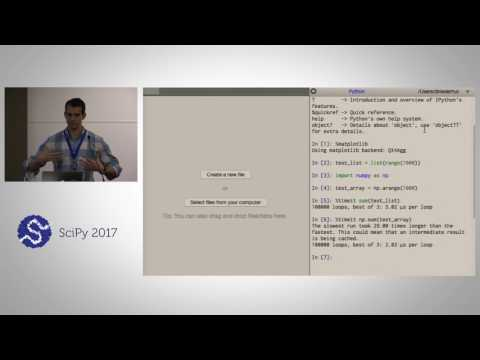

In [247]:
from IPython.display import YouTubeVideo
YouTubeVideo('lKcwuPnSHIQ')

### Numpy Dokumentation

Dieser kurze Überblick hat viele der wichtigen Dinge angesprochen, die Sie über numpy wissen müssen, ist aber bei weitem nicht vollständig. Schauen Sie sich die [_Numpy_ Dokumentation](http://docs.scipy.org/doc/numpy/reference/) an, um viel mehr über _Numpy_ zu erfahren.

Du kannst jetzt Daten einlesen und mit Numpy analysieren. Lerne in der nächsten Lektion, wie du mit _Matplotlib_ wissenschaftlich plotten kannst.

Hier ist das Übungsblatt zu diesem Notebook: [**04 - Übungsaufgaben Numerische Berechnungen in Numpy**](04%20-%20Uebungsaufgaben%20Numerische%20Berechnungen%20in%20Numpy.ipynb)

![EigeneBearbeitungszeit](images/EigeneBearbeitungszeit.png)

---

Wahlpflichtach Künstliche Intelligenz I: Praktikum | [Startseite](index.ipynb)